In [278]:
import pandas as pd
import matplotlib.pyplot as plt

racesCreateDateparse = lambda x: pd.datetime.strptime(x, '%d.%m.%Y')
racesCreated = pd.read_csv("races.csv", sep=";",parse_dates=['race_created'],date_parser=racesCreateDateparse, usecols=['id','race_created'])
racesCreated.dropna(how="all")
createdRacesSize = racesCreated['race_created'].size
createdRacesSize

166609

In [279]:
drivenRaces = pd.read_csv("races.csv", sep=";", usecols=['id','race_driven'])
#drivenRaces.dropna(how="all")

#validate dataframe
drivenRacesWithValidTimeStamps = drivenRaces.loc[drivenRaces['race_driven'] != "0000-00-00 00:00:00"]
drivenRacesSize = drivenRacesWithValidTimeStamps['race_driven'].size
drivenRacesSize

109099

In [280]:
createdButNotDrivenRaces = createdRacesSize - drivenRacesSize
createdButNotDrivenRaces

57510

### Absprungrate von ca 30 %

In [281]:
firstCreatedRace = min(racesCreated['race_created'])
firstCreatedRace

Timestamp('2012-03-06 00:00:00')

In [282]:
lastCreatedRace = max(racesCreated['race_created'])
lastCreatedRace

Timestamp('2017-06-27 00:00:00')

In [283]:
#maximal erstellte Rennen
max(racesCreated['race_created'].value_counts().sort_index())

1303

In [284]:
createdButNotDrivenRaces

57510

In [285]:
sumOfSameRacesAtOneDay = racesCreated['race_created'].value_counts()
sumOfSameRacesAtOneDay.head().to_frame()

,race_created
2012-03-08,1303
2012-03-07,1158
2012-12-11,938
2012-12-17,922
2012-03-06,891


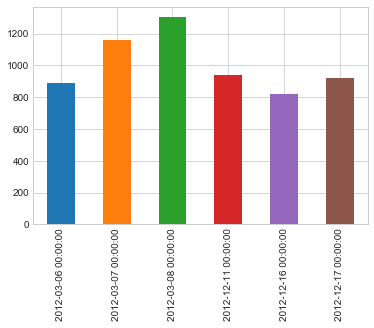

In [286]:
#top 5, wo am meisten Rennen erstellt worden sind
sumOfSameRacesAtOneDay.loc[lambda x : x>800].sort_index().plot.bar()

In [287]:
test = racesCreated['race_created'].value_counts().sort_index().reset_index()
#test

In [288]:
#df2 = pd.DataFrame()
#df2['race_created'] = test['index'] #race_created
#df2['count'] = df2['race_created'].value_counts()
#df2

In [289]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.style.use('seaborn-whitegrid')
import numpy as np

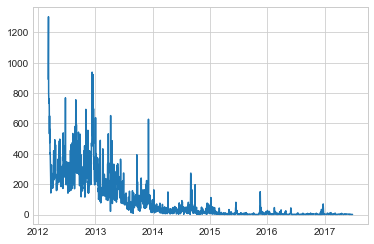

In [290]:
fig = plt.figure()
ax = plt.axes()
plt.plot(test['index'],test['race_created'],linestyle='solid')